In [2]:
import numpy as np
import scipy.integrate
import itertools
import matplotlib.pyplot as plt
import operator

In [224]:
N = 20

In [225]:
t, dt = np.linspace(0, 2, N+1, retstep=True)

In [226]:
x0 = 0
x1 = 0

In [227]:
def f0(par):
    return (par[0]+(par[1]**2))

In [228]:
G = []
G.append([x0])
for i in range(1, N):
    xs = np.linspace(-3, 3, 30)
    G.append(xs)
G.append([x1])

In [229]:
M = []
for k in range(0, len(G)-1):
    M.append([])
    for i in G[k]:
        for j in G[k+1]:
            v = [None, None]
            v.append(round(i, 2))
            v.append(round(j, 2))
            u = -j - (j - i)/dt
            if -3. <= u <= 3.:
                v[1] = round(u, 2)
                v[0] = (f0([j , u]) + f0([i, u]))/2
                M[k].append(v)

In [230]:
J = []


c = 0
f = len(M)
for i in M:
    J.append({})
    NM = [j[3] for j in i]
    dest = np.unique(NM, axis=0)
    if c == 19:
        print(dest)
    for j in dest:
        z = j
        l = [item for item in i if np.all(item[3] == z)]
        minimum = np.inf
        m_dot = 0
        for k in l:
            if c == 0:
                if k[0] < minimum:
                    minimum = k[0]
                    m_dot = k.copy()
            else:
                if k[2] in J[c-1]:
                    if k[0] + J[c-1][k[2]][0] <  minimum:
                        minimum = k[0] + J[c-1][k[2]][0]
                        m_dot = k.copy()
            J[c][z] = [minimum, m_dot]
    c += 1

[0]


In [231]:
dot_opt = min(J[19], key= lambda k: J[19][k][0])

In [232]:
xopt = []
uopt = []
Jopt = 0 

In [233]:
Jopt = J[19][dot_opt][0]

In [234]:
next_opt = dot_opt
for i in range(19, -1, -1):
    xopt.insert(0 ,J[i][next_opt][1][3])
    uopt.insert(0, J[i][next_opt][1][1])
    next_opt = J[i][next_opt][1][2]

xopt.insert(0, x0)

In [235]:
Jopt

0.5921521997621875

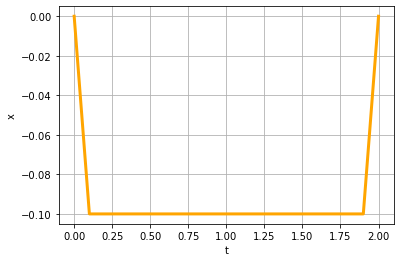

In [236]:
fig, ax = plt.subplots()

ax.plot(t, xopt, linewidth=3, color = 'orange')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.grid()

plt.show()

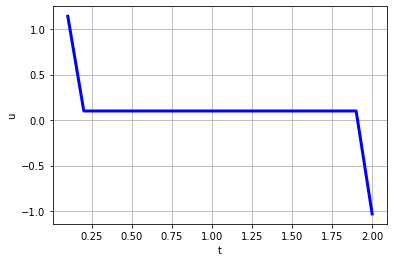

In [237]:
fig, ax = plt.subplots()

ax.plot(t[1:], uopt, linewidth=3, color = 'blue')
ax.set_xlabel('t')
ax.set_ylabel('u')
ax.grid()

plt.show()